In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_csv('../Processes/Suma/Suma_todasLasSesiones.csv')
a_r = pd.read_csv('../aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [3]:
data.shape

(443, 12)

In [32]:
train = data.copy()
#test = data.tail(3)

In [33]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [34]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm', 'Nota']].to_numpy()

In [35]:
X

array([[  1.,   1.,   3., ...,   6.,   0.,   4.],
       [  1.,  72.,  10., ...,  18.,   0.,   3.],
       [  1.,   2., 103., ...,  21.,   0.,   3.],
       ...,
       [ 11.,   3., 215., ..., 123.,   0.,   2.],
       [  2.,  11., 245., ...,  48.,   0.,   2.],
       [  2.,   3.,   8., ...,  68.,   1.,   3.]])

In [36]:
X.shape

(443, 10)

### Normalizan los datos

In [37]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [38]:
X_std

array([[-0.39481794, -0.24422286, -0.3861479 , ..., -0.58945359,
        -0.12191773,  0.26172459],
       [-0.39481794,  0.96148136, -0.31197517, ..., -0.54556347,
        -0.12191773, -0.5547824 ],
       [-0.39481794, -0.22724111,  0.67346261, ..., -0.53459094,
        -0.12191773, -0.5547824 ],
       ...,
       [-0.03426476, -0.21025936,  1.86022637, ..., -0.1615249 ,
        -0.12191773, -1.37128938],
       [-0.35876262, -0.07440536,  2.17810952, ..., -0.43583816,
        -0.12191773, -1.37128938],
       [-0.35876262, -0.21025936, -0.33316738, ..., -0.36268796,
        -0.01785308, -0.5547824 ]])

### silhouette_score y metodo del codo

In [39]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt

In [40]:
train=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']]

In [41]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [42]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


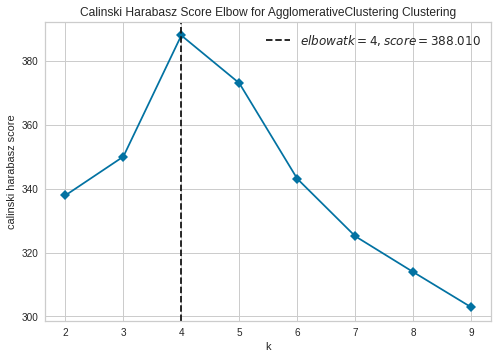

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [43]:
graficarCS(train,'ward')

In [ ]:
graficarCS(train,'ward','silhouette')

In [ ]:
graficarCS(train,'single')

In [ ]:
graficarCS(train,'single','silhouette')

Con link= complete y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


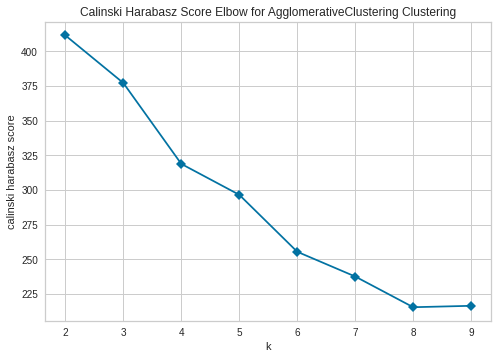

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


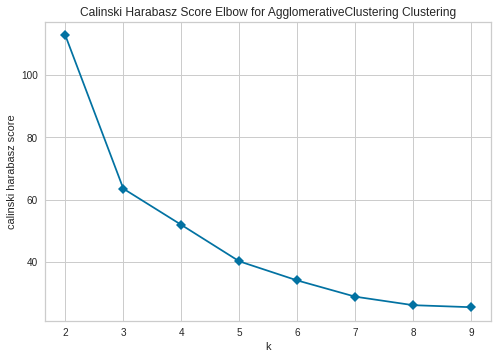

Con link= complete y affinity= l1 


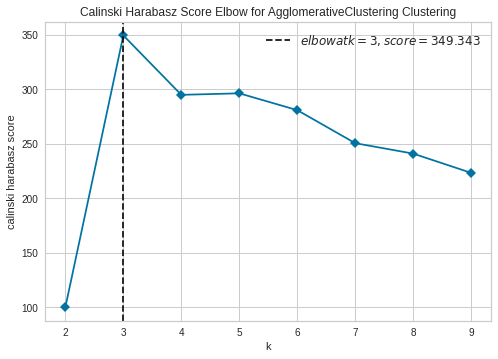

Con link= complete y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


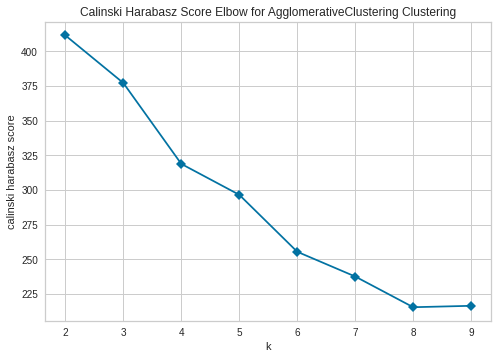

In [44]:
graficarCS(train,'complete')

Con link= complete y affinity= euclidean 


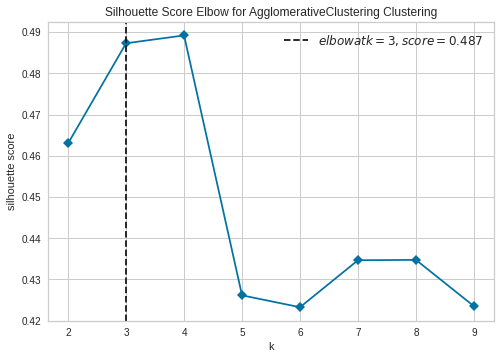

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


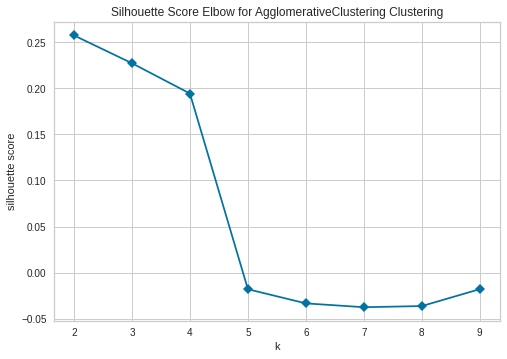

Con link= complete y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


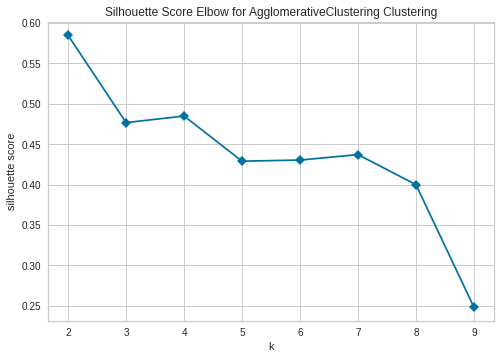

Con link= complete y affinity= l2 


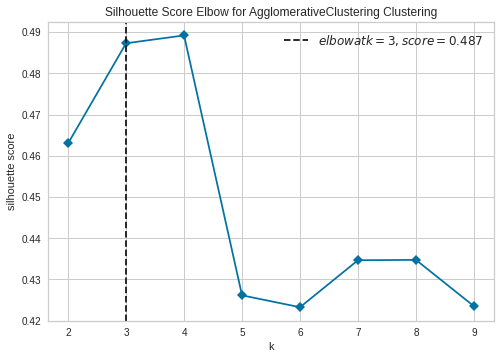

In [45]:
graficarCS(train,'complete','silhouette')

Con link= average y affinity= euclidean 


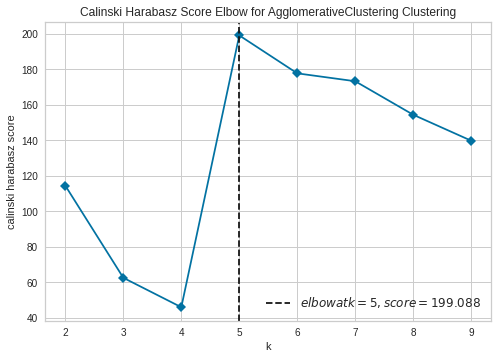

Con link= average y affinity= cosine 


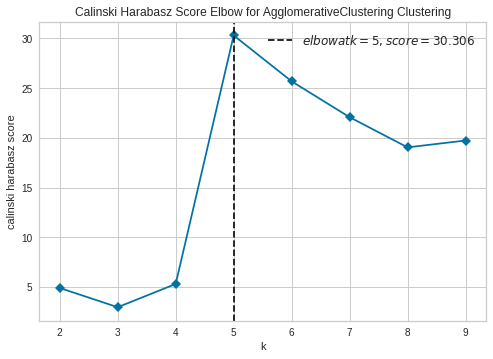

Con link= average y affinity= l1 


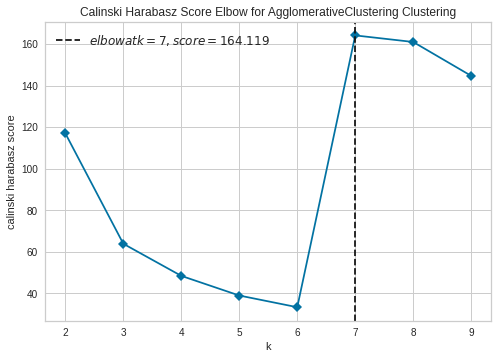

Con link= average y affinity= l2 


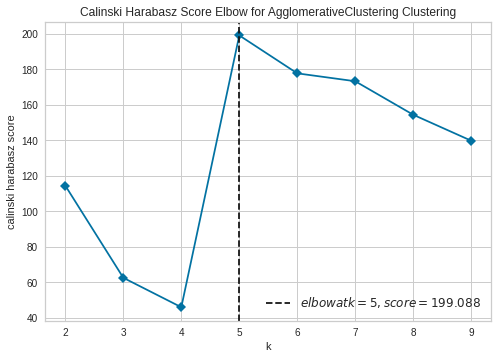

In [46]:
graficarCS(train,'average')

Con link= average y affinity= euclidean 


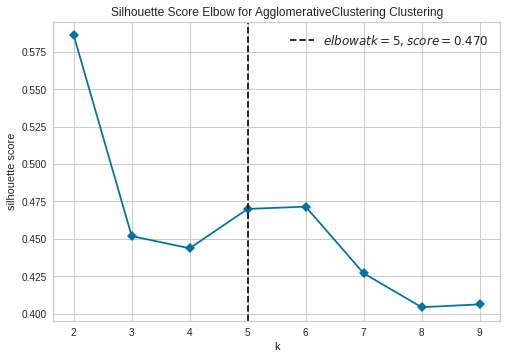

Con link= average y affinity= cosine 


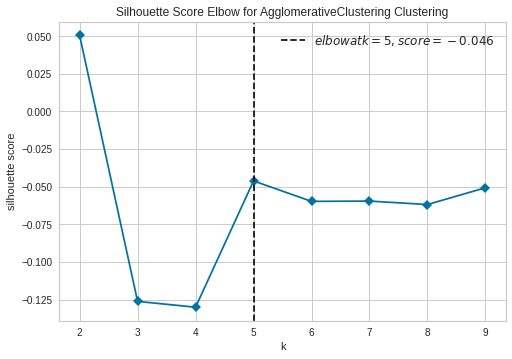

Con link= average y affinity= l1 


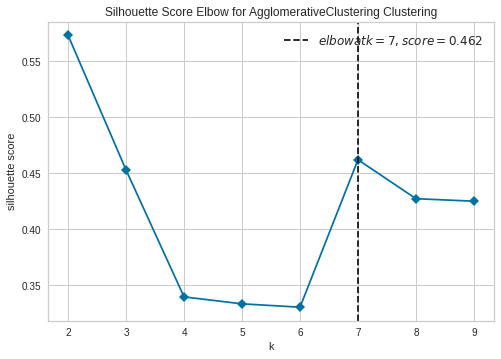

Con link= average y affinity= l2 


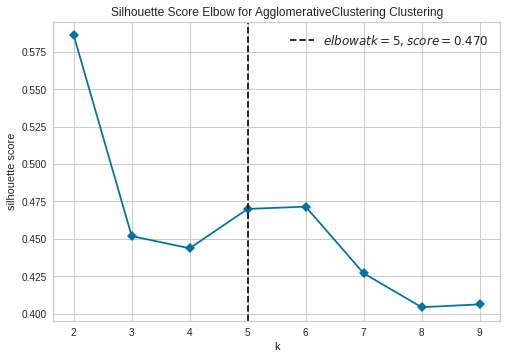

In [47]:
graficarCS(train,'average','silhouette')

## Clustering

In [48]:
## mejores opciones obtenidas de acuerdo al silouhette score
# ward = cluster_ac(train, 6, 'ward', 'euclidean')
# singleE = cluster_ac(train, 5, 'single', 'euclidean')
singlel1 = cluster_ac(train, 3, 'single', 'l1')
singlel2 = cluster_ac(train, 3, 'single', 'l2')
# #completeE = cluster_ac(train, 3, 'complete', 'euclidean')
# completeC = cluster_ac(train, 5, 'complete', 'cosine')
# averageE = cluster_ac(train, 3, 'average', 'euclidean')
averageC = cluster_ac(train, 5, 'average', 'cosine')
averagel1 = cluster_ac(train, 7, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [49]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [50]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [51]:
# results = pd.DataFrame(np.column_stack([reducir_dim_tsne(train,2),ward,singleE,singlel1,singlel2,completeC,
#                                         averageE,averageC,averagel2]), 
#                       columns=["x", "y", "AGW", "AGSE", "AGSl1",'AGSl2','AGCC','AGAE','AGAC','AGAl2']) #,completeE , "AGCE"
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(train,2),singlel1,singlel2,averageC,averagel1]), 
                      columns=["x", "y",  "AGSl1",'AGSl2','AGAC','AGAl1'])

## Mostrar los resultados

In [52]:
import seaborn as sns

In [53]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(4,1 , figsize=(20, 100))
    
#     sns.scatterplot(data=res, x="x", y="y", hue="AGW", ax=ax[0], legend="full")
#     ax[0].set_title('AGW')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[1], legend="full")
#     ax[1].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl1", ax=ax[0], legend="full")
    ax[0].set_title('AGSl1')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl2", ax=ax[1], legend="full")
    ax[1].set_title('AGSl2')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCE", ax=ax[4], legend="full")
#     ax[3].set_title('AGCE')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCC", ax=ax[4], legend="full")
#     ax[3].set_title('AGCC')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGAE", ax=ax[5], legend="full")
#     ax[3].set_title('AGAE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAC", ax=ax[2], legend="full")
    ax[2].set_title('AGAC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAl1", ax=ax[3], legend="full")
    ax[3].set_title('AGAl1')

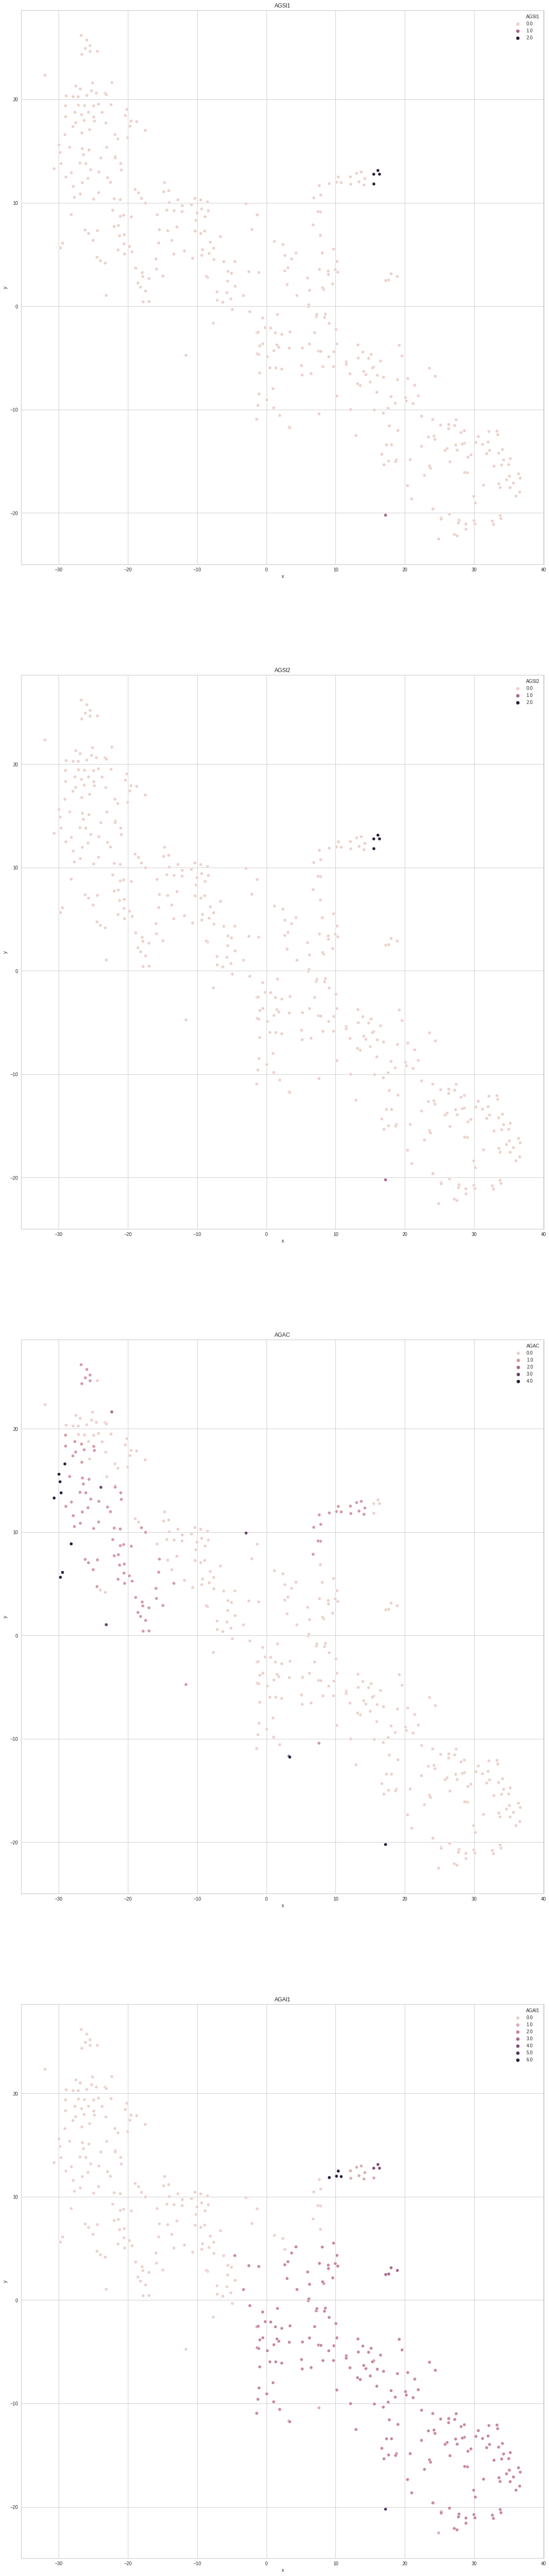

In [54]:
mostrar_resultados(results)

In [55]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [56]:
getElements(singlel1)

{0: 436, 1: 2, 2: 5}

In [57]:
getElements(averagel1)

{0: 194, 1: 11, 2: 223, 3: 6, 4: 3, 5: 2, 6: 4}

In [58]:
getElements(singlel2)

{0: 436, 1: 2, 2: 5}

In [59]:
getElements(averageC)

{0: 329, 1: 96, 2: 1, 3: 4, 4: 13}

## relaciona con aprobados o reprobados

In [60]:
#accuracy_score(ward_c, test)
aprobado = resultado[['aprobar']]

In [61]:
aprobado

,aprobar
0,1
1,0
2,1
3,0
4,0
...,...
438,0
439,1
440,0
441,0


In [62]:
columnas = list(train.columns)+['cluster']+list(aprobado.columns)

In [63]:
union = pd.DataFrame(np.column_stack([train,averagel1,aprobado]),columns=columnas)

In [64]:
union

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
0,1.0,1.0,3.0,782.0,27.0,149.0,39.0,6.0,0.0,0.0,1.0
1,1.0,72.0,10.0,157.0,36.0,176.0,47.0,18.0,0.0,0.0,0.0
2,1.0,2.0,103.0,195.0,3.0,198.0,95.0,21.0,0.0,0.0,1.0
3,1.0,2.0,4.0,143.0,2.0,582.0,153.0,48.0,1.0,0.0,0.0
4,1.0,3.0,6.0,189.0,22.0,118.0,65.0,46.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
438,1.0,1.0,5.0,1663.0,337.0,788.0,94.0,225.0,1.0,2.0,0.0
439,1.0,2.0,10.0,2812.0,336.0,761.0,24.0,0.0,2.0,2.0,1.0
440,11.0,3.0,215.0,2952.0,194.0,797.0,210.0,123.0,0.0,2.0,0.0
441,2.0,11.0,245.0,785.0,1.0,570.0,115.0,48.0,0.0,0.0,0.0


In [65]:
getElements(union[['cluster']])

{0.0: 194, 1.0: 11, 2.0: 223, 3.0: 6, 4.0: 3, 5.0: 2, 6.0: 4}

In [67]:
union.groupby(by=['cluster','aprobar']).count()

Study  Deeds  Texteditor  Diagram  Properties  Other  Blank  \
cluster aprobar                                                                
0.0     0.0        100    100         100      100         100    100    100   
        1.0         94     94          94       94          94     94     94   
1.0     0.0          5      5           5        5           5      5      5   
        1.0          6      6           6        6           6      6      6   
2.0     0.0        104    104         104      104         104    104    104   
        1.0        119    119         119      119         119    119    119   
3.0     0.0          3      3           3        3           3      3      3   
        1.0          3      3           3        3           3      3      3   
4.0     0.0          3      3           3        3           3      3      3   
5.0     0.0          2      2           2        2           2      2      2   
6.0     0.0          2      2           2        2           2      2      2   
        1.0          2      2           2        2           2      2      2   

                 Aulaweb  Fsm  
cluster aprobar                
0.0     0.0          100  100  
        1.0           94   94  
1.0     0.0            5    5  
        1.0            6    6  
2.0     0.0          104  104  
        1.0          119  119  
3.0     0.0            3    3  
        1.0            3    3  
4.0     0.0            3    3  
5.0     0.0            2    2  
6.0     0.0            2    2  
        1.0            2    2

In [66]:
for i in range(6):
    print(getElements(union[(union['cluster']==i)].aprobar))

{0.0: 100, 1.0: 94}
{0.0: 5, 1.0: 6}
{0.0: 104, 1.0: 119}
{0.0: 3, 1.0: 3}
{0.0: 3}
{0.0: 2}


In [45]:
union.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,17.380952,12.857143,39.761905,2679.190476,342.746032,891.095238,255.015873,332.174603,2.698413,0.539683
1.0,14.392308,18.538462,61.953846,1778.446154,320.638462,626.069231,316.538462,153.123077,1.238462,0.469231
2.0,24.846154,9.076923,53.307692,2741.692308,435.769231,4314.692308,98.153846,229.692308,0.615385,0.384615
3.0,8.374302,18.139665,19.139665,377.871508,24.620112,399.497207,115.312849,111.201117,0.016760,0.474860
4.0,3.833333,1.333333,6.333333,562.666667,40.666667,2636.416667,299.333333,212.333333,0.083333,0.666667
5.0,10.348837,4.558140,52.348837,3728.697674,306.162791,780.302326,176.976744,175.395349,4.069767,0.697674
